<a href="https://colab.research.google.com/github/fertr98/4GeeksAcademy/blob/master/Time_series_Project_Lake_Bilancino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!pip install pmdarima==2.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.1 MB/s eta 0:00:00


In [5]:
#load data
raw_data = pd.read_csv("/content/sample_data/Lake_Bilancino (1).csv")
raw_data.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


In [7]:
# process data and keep only with interest columns

total_data = raw_data.drop(['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci','Flow_Rate'],  axis=1)
total_data.head()


,Date,Lake_Level
0,03/06/2002,249.43
1,04/06/2002,249.43
2,05/06/2002,249.43
3,06/06/2002,249.43
4,07/06/2002,249.44


In [12]:
max_lake_level = total_data['Lake_Level'].max()
min_lake_level = total_data['Lake_Level'].min()

print(f"The max level over the years of lake Bilancino is: {max_lake_level}")
print(f"The min level over the years of lake Bilancino is: {min_lake_level}")

The max level over the years of lake Bilancino is: 252.76
The min level over the years of lake Bilancino is: 243.53


In [13]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        6603 non-null   object 
 1   Lake_Level  6603 non-null   float64
dtypes: float64(1), object(1)
memory usage: 103.3+ KB


no null data


In [14]:
#  transformation of data to generate a time series with two dimensions
total_data["Date"] = pd.to_datetime(total_data["Date"], dayfirst=True)
total_data = total_data.set_index("Date")
ts_lake = total_data["Lake_Level"]
ts_lake.head()


Date
2002-06-03    249.43
2002-06-04    249.43
2002-06-05    249.43
2002-06-06    249.43
2002-06-07    249.44
Name: Lake_Level, dtype: float64

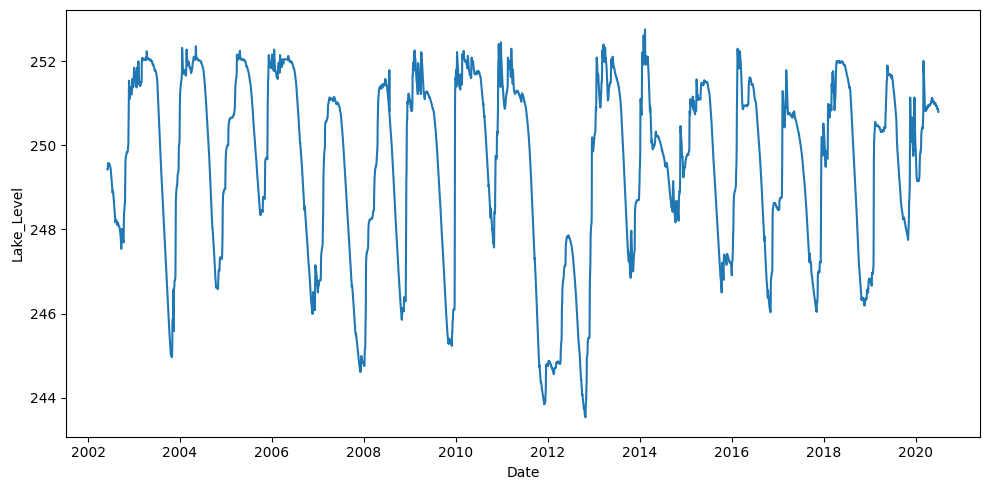

In [15]:
# Plot data to visualize:

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts_lake)


plt.tight_layout()
plt.show()

In [24]:
# descomposing time serie
# minimum time unit = one year

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_lake, period = 365)
decomposition

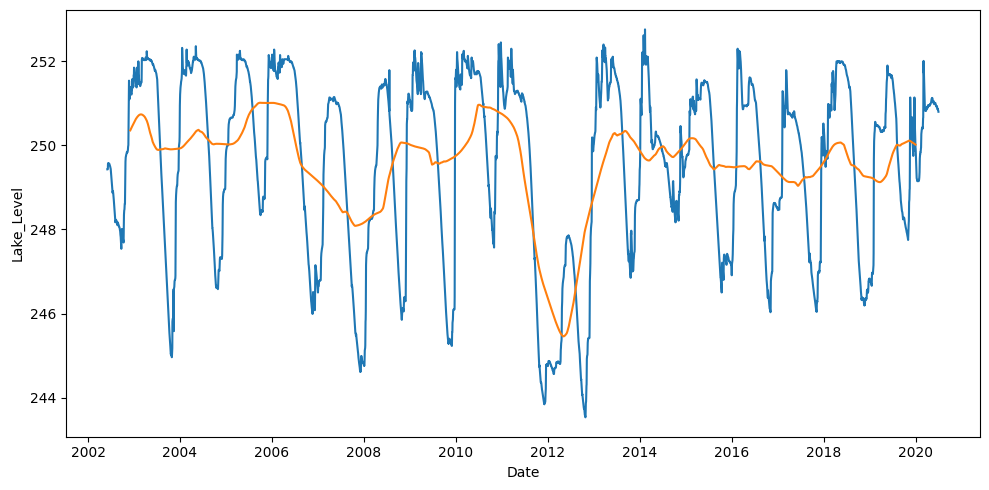

In [25]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_lake)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

A lot of variability in the trend, therefore, it have some relation with some external factor as climatology

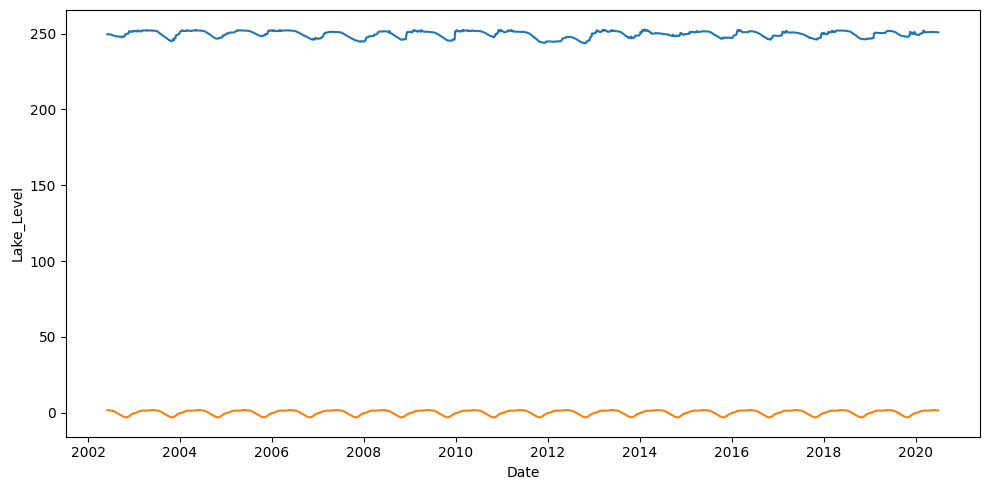

In [26]:
#visualization os stationary type

seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_lake)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [31]:
# Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_lake)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -6.880991e+00
p-value                        1.433634e-09
#Lags Used                     3.500000e+01
Number of Observations Used    6.567000e+03
Critical Value (1%)           -3.431346e+00
Critical Value (5%)           -2.861980e+00
Critical Value (10%)          -2.567004e+00
dtype: float64

p-value is greater than 0.05, this means that our null hypothesis will be rejected and we will take this series as non-stationary.

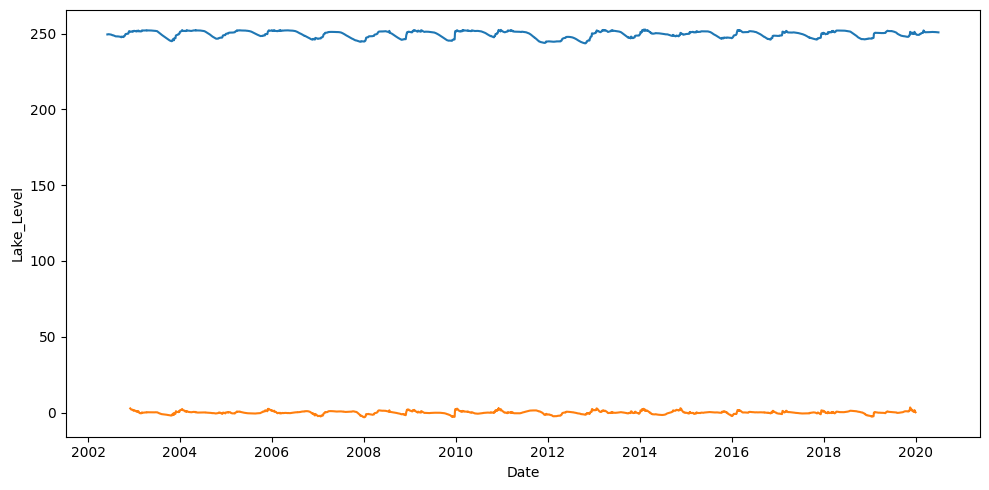

In [32]:
# Is there variability or noise?

residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_lake)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

There is some variability, but not too much. Max Lake_level = 252.76 & min Lave_level = 243.53

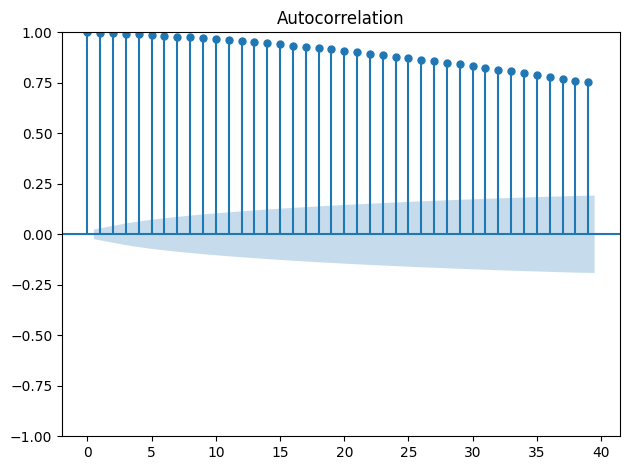

In [33]:
# correlation

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts_lake)

plt.tight_layout()

plt.show()

The graph shows that the autocorrelations are very high and persistent. This indicates that the lake's water levels are highly correlated with its past values. The slow decay of the autocorrelation suggests that the time series has a trend or non-stationarity component.

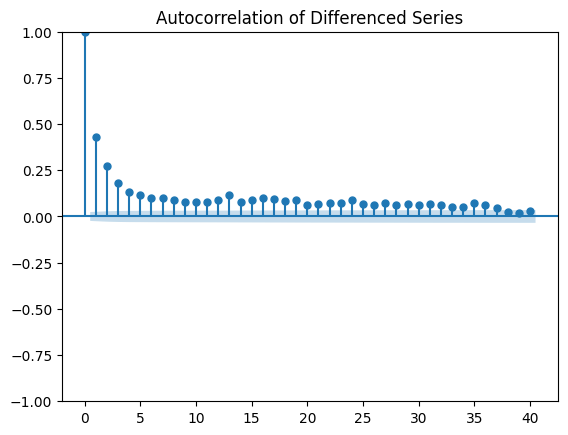

ADF Statistic: -10.865056104715173
p-value: 1.4143841746903047e-19


In [34]:
# We are going to predict the next year lake level of la lake Bilancino, but first we have to transform the non-stationary time series
# into a stationary one.

from statsmodels.tsa.stattools import adfuller

# Diferenciar la serie
ts_lake_diff = ts_lake.diff().dropna()

# Graficar ACF de la serie diferenciada
plot_acf(ts_lake_diff, lags=40)
plt.title('Autocorrelation of Differenced Series')
plt.show()

# Prueba de Dickey-Fuller
result = adfuller(ts_lake_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

P-value is very low = 1.4143841746903047e-19.

Now we have a stationary time series and we can train the ARIMA model

In [35]:
from pmdarima import auto_arima
model = auto_arima(ts_lake, seasonal=False, trace=True, d=1)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-12552.739, Time=14.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11118.435, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12469.605, Time=3.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12130.639, Time=2.75 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11120.409, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-12561.114, Time=11.50 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-12395.703, Time=3.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-12554.341, Time=4.85 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-12598.109, Time=14.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-12479.939, Time=6.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-12601.954, Time=18.37 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=25.36 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-12604.650, Time=20.03 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-12616.579, Time=20.30 sec
 ARIM

Best model:  ARIMA(1,1,5)(0,0,0)[0]

In [37]:
# predict the next year

forecast = model.predict(365)
forecast

2020-07-01    250.790266
2020-07-02    250.783303
2020-07-03    250.777945
2020-07-04    250.773469
2020-07-05    250.769371
                 ...    
2021-06-26    250.635655
2021-06-27    250.635655
2021-06-28    250.635655
2021-06-29    250.635655
2021-06-30    250.635655
Freq: D, Length: 365, dtype: float64

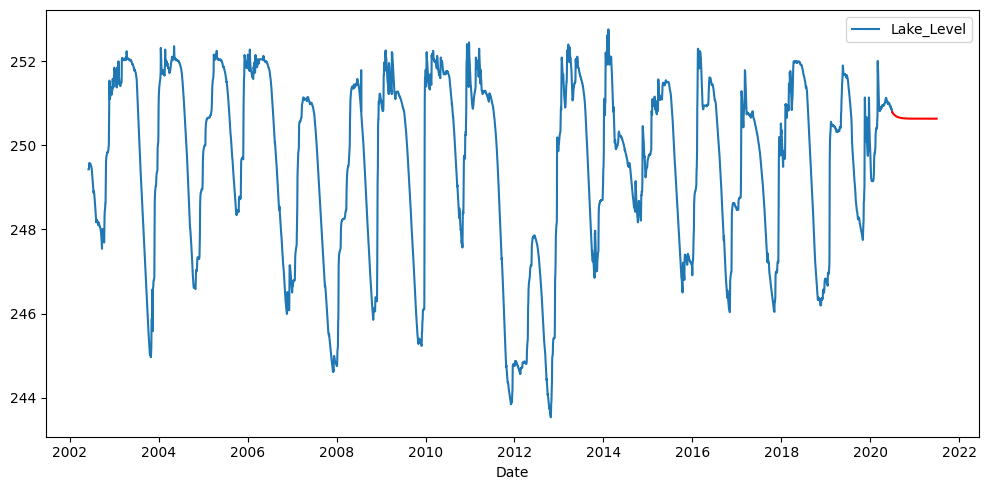

In [38]:
# visualization of the time series + prediction

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)
sns.lineplot(data = forecast, c = "red")

plt.tight_layout()

plt.show()